In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [71]:
data = pd.read_csv('data/test_42.csv')

In [72]:
columns = data.columns
drugs = columns[2:-1]

In [73]:
df = data.copy()

# Les données manquantes
Visiblement, il n'y a pas de données manquante

In [74]:
data.isna().value_counts()

patient_id  timestamp  drug_0  drug_1  drug_2  drug_3  drug_4  drug_5  drug_6  drug_7  drug_8  drug_9  drug_10  drug_11  drug_12  drug_13  drug_14  drug_15  drug_16  drug_17  drug_18  hospit
False       False      False   False   False   False   False   False   False   False   False   False   False    False    False    False    False    False    False    False    False    False     30220351
dtype: int64

In [75]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

patient_id    0.0
drug_17       0.0
drug_16       0.0
drug_15       0.0
drug_14       0.0
drug_13       0.0
drug_12       0.0
drug_11       0.0
drug_10       0.0
drug_9        0.0
drug_8        0.0
drug_7        0.0
drug_6        0.0
drug_5        0.0
drug_4        0.0
drug_3        0.0
drug_2        0.0
drug_1        0.0
drug_0        0.0
timestamp     0.0
drug_18       0.0
hospit        0.0
dtype: float64

# Balancement des classes: Hospitalisé vs Non hospitalisé
Les classes sont débalancées
### 79 % de non Hospitalisé
### 20 % de Hospitalisé

In [76]:
df['hospit'].value_counts()/df.shape[0]

0    0.790795
1    0.209205
Name: hospit, dtype: float64

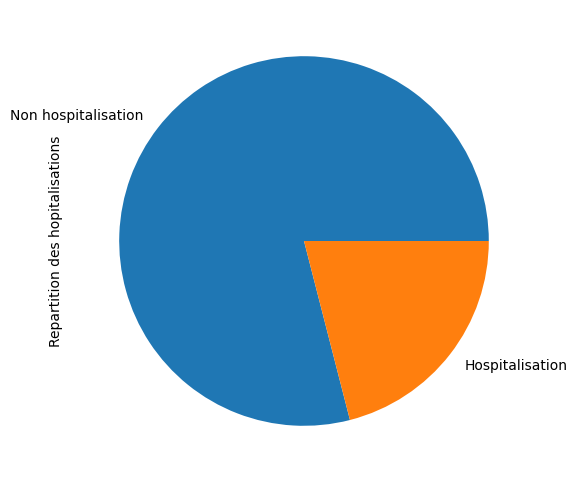

In [77]:
series = pd.Series([0.79, 0.21], index=["Non hospitalisation", "Hospitalisation"], name="Repartition des hopitalisations")

series.plot.pie(figsize=(6, 6));

In [78]:
df = pd.read_csv('data/test_42.csv', index_col='timestamp', parse_dates=True)

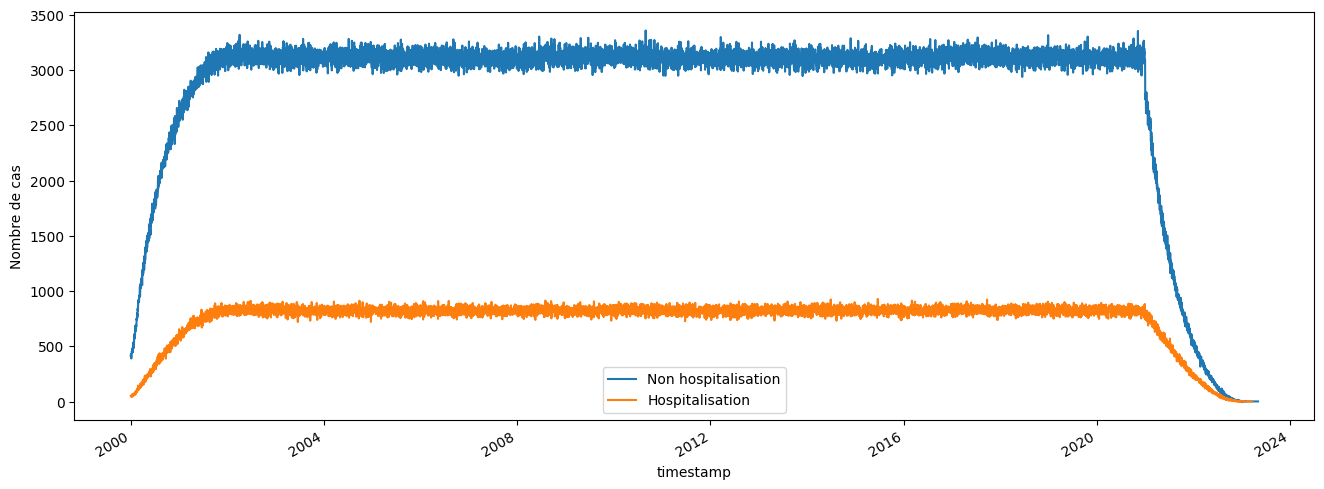

In [79]:
df[df['hospit'] == 0]['hospit'].groupby('timestamp').count().plot(figsize=(16,6), label = 'Non hospitalisation')
df[df['hospit'] == 1]['hospit'].groupby('timestamp').count().plot(figsize=(16,6), label = 'Hospitalisation')
plt.ylabel('Nombre de cas')
plt.legend()
plt.show()

In [80]:
nbr_prescription = []
nbr_hospit = []
for drug in drugs:
    nbr_prescription.append(df[df[drug]==1][drug].count())
    nbr_hospit.append(df[(df[drug]==1) & (df['hospit']==1)][drug].count())
    
print(nbr_prescription)
print(nbr_hospit)

[6837910, 6845658, 6830204, 6826387, 6837119, 6834351, 6842693, 6831875, 6849640, 6847194, 6841986, 6844017, 6836796, 6835227, 6833702, 6831015, 6823159, 6830459, 6832903]
[1840251, 1903203, 1854302, 1753777, 1949969, 1900935, 1903449, 1868070, 1826081, 1893847, 1885304, 1951006, 1967042, 1865782, 1787688, 1890179, 1947739, 1928443, 1966416]


In [81]:
temp_h, temp_p = nbr_hospit, nbr_prescription
min_ = min(min(temp_h), min(temp_p))
max_ = max(max(temp_p), max(temp_h))
for i in range(len(nbr_prescription)):
    nbr_prescription[i] = (temp_p[i] - min_)/(max_ - min_) + 1
    nbr_hospit[i] = (temp_h[i] - min_)/(max_ - min_) + 1

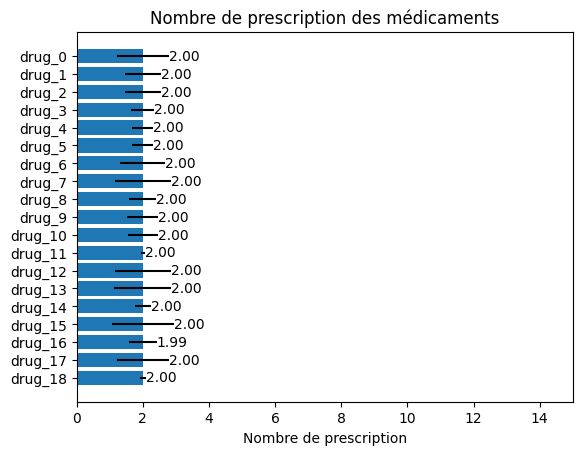

In [82]:
y_pos = np.arange(len(drugs))
error = np.random.rand(len(drugs))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, nbr_prescription, xerr=error, align='center')
ax.set_yticks(y_pos, labels=drugs)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Nombre de prescription')
ax.set_title('Nombre de prescription des médicaments')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()

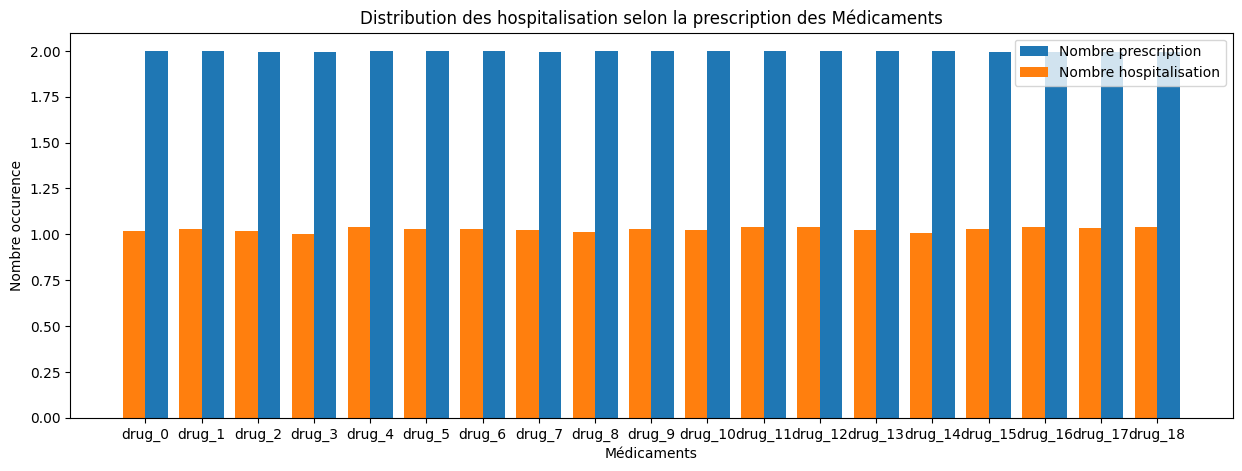

In [83]:
X_axis = np.arange(len(drugs))

plt.figure(figsize=(15, 5) )
plt.bar(X_axis + 0.2, nbr_prescription, 0.4, label = 'Nombre prescription')
plt.bar(X_axis - 0.2, nbr_hospit, 0.4, label = 'Nombre hospitalisation')
  
plt.xticks(X_axis, drugs)
plt.xlabel("Médicaments")
plt.ylabel("Nombre occurence")
plt.title("Distribution des hospitalisation selon la prescription des Médicaments")
plt.legend()
plt.show()

## Suppression des Non-poly

In [89]:
df['poly'] = df['drug_0'] + df['drug_1'] +df['drug_2'] +df['drug_3'] + df['drug_4']+\
    df['drug_5'] + df['drug_6'] + df['drug_7'] + df['drug_8'] + df['drug_9'] + df['drug_10']+\
    df['drug_11'] + df['drug_12'] + df['drug_13'] + df['drug_14'] + df['drug_15'] + df['drug_16']+\
    df['drug_17'] + df['drug_18']
df = df[df['poly'] >= 5]

#### Sauvegarde des données
df.to_csv('data/poly_only.csv')

print(f'Shape: {df.shape}')
df.head()


Shape: (11830229, 22)


,patient_id,drug_0,drug_1,drug_2,drug_3,drug_4,drug_5,drug_6,drug_7,drug_8,...,drug_11,drug_12,drug_13,drug_14,drug_15,drug_16,drug_17,drug_18,hospit,poly
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,5
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,1,0,1,0,0,5
2,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,0,1,0,1,5
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,0,1,0,1,5
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,0,1,0,0,5


In [85]:
df = pd.read_csv('data/poly_only.csv')

In [86]:
""" df.drop(['poly'], axis=1)

#Sauvegarde des données
df.to_csv('data/poly_only.csv', index=False)


print(f'Shape: {df.shape}')
df.head()
 """

" df.drop(['poly'], axis=1)\n\n#Sauvegarde des données\ndf.to_csv('data/poly_only.csv', index=False)\n\n\nprint(f'Shape: {df.shape}')\ndf.head()\n "

## Balancement apres suppression des Non-polypharmacies
####    70% Non hospitalisées
####    30 % Hospitaliées

In [87]:
df['hospit'].value_counts()/df.shape[0]

0    0.697059
1    0.302941
Name: hospit, dtype: float64

In [88]:
df = pd.read_csv('data/poly_only.csv', index_col='timestamp', parse_dates=True)#Récupération de la sauvegarde
df.head()

ValueError: 'timestamp' is not in list

# Graphe du nombre d'hospitalisation de 2000 - 2024

In [ ]:
df[df['hospit'] == 0]['hospit'].groupby('timestamp').count().plot(figsize=(16,6), label = 'Non hospitalisées')
df[df['hospit'] == 1]['hospit'].groupby('timestamp').count().plot(figsize=(16,6), label = 'hospitalisées')
plt.legend()
plt.show()

KeyError: 'timestamp'

### 2020 - 2024

In [ ]:
df[df['hospit'] == 0]['2020':'2024']['hospit'].groupby('timestamp').count().plot(figsize=(16,6), label = 'Non hospitalisées')
df[df['hospit'] == 1]['2020':'2024']['hospit'].groupby('timestamp').count().plot(figsize=(16,6), label = 'hospitalisées')
plt.legend()
plt.show()

TypeError: cannot do slice indexing on Int64Index with these indexers [2020] of type str

# Graph de prescription
### Exemple de la drogue 0 et 1 durant la période de 2020-10

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_16900\3971508199.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df[df['hospit'] == 1]['2000':'2022']['drug_1'].groupby('timestamp').count().plot(figsize=(16,6), label = 'drug_1')


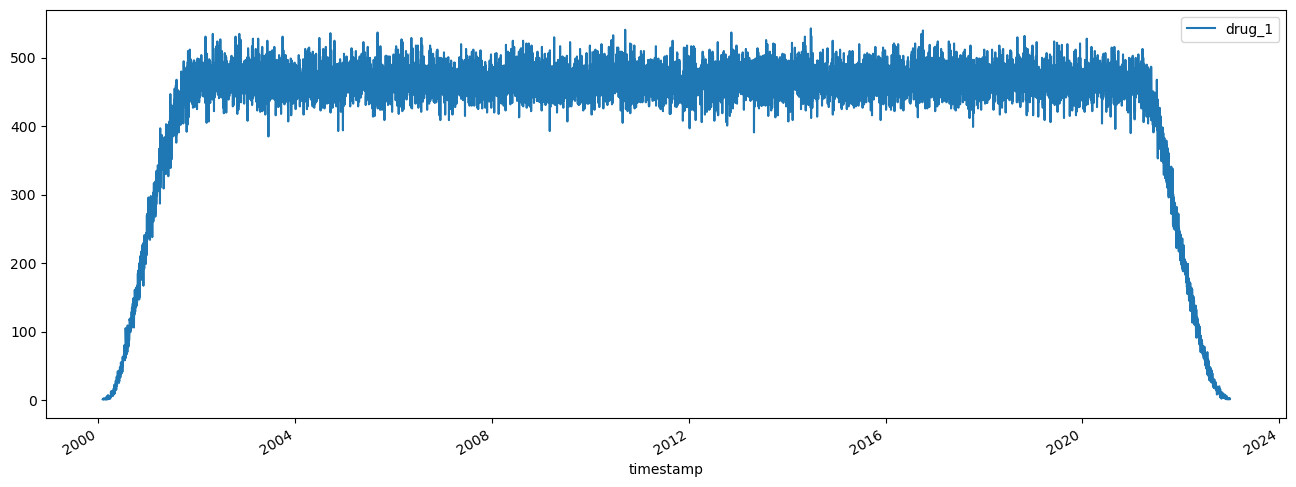

In [ ]:
#df[df['hospit'] == 1]['2000':'2022']['drug_0'].groupby('timestamp').count().plot(figsize=(16,6), label = 'drug_0')
df[df['hospit'] == 1]['2000':'2022']['drug_1'].groupby('timestamp').count().plot(figsize=(16,6), label = 'drug_1')
plt.legend()
plt.show()

# Distribution des hospitalisation

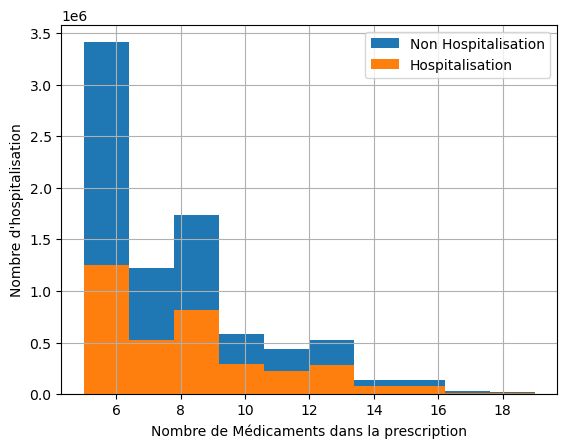

In [ ]:
plt.xlabel('Nombre de Médicaments dans la prescription')
plt.ylabel("Nombre d'hospitalisation")
df[df['hospit'] == 0]['poly'].hist(label='Non Hospitalisation')
df[df['hospit'] == 1]['poly'].hist(label='Hospitalisation')
plt.legend()

<AxesSubplot: xlabel='Nombre de Médicaments dans la prescription', ylabel="Nombre d'hospitalisation">

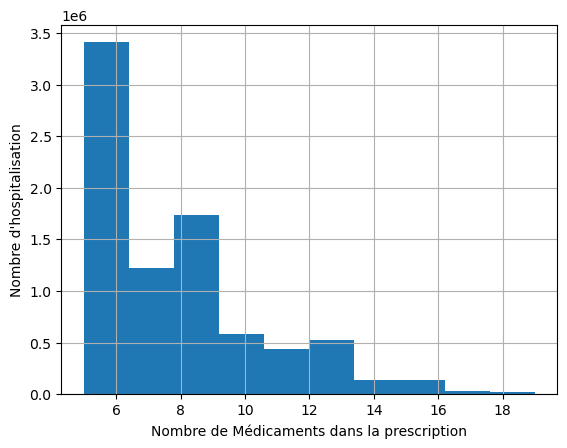

In [ ]:
plt.xlabel('Nombre de Médicaments dans la prescription')
plt.ylabel("Nombre d'hospitalisation")
df[df['hospit'] == 0]['poly'].hist()

# Elimination des: poly >= 10 avec hospit == 0

In [ ]:
df= df[(df['poly']<13) | ((df['poly']>=13) & (df['hospit'] == 1))]
print('Shape: ',df.shape)
print('Nouveau balencement de la classe')
df['hospit'].value_counts()/df.shape[0]

Shape:  (11287583, 22)
Nouveau balencement de la classe


0    0.682496
1    0.317504
Name: hospit, dtype: float64

Shape:  (11830229, 22)


0    0.697059
1    0.302941
Name: hospit, dtype: float64

# Elimination des duplications

In [ ]:

df = df.drop_duplicates(subset=['patient_id','drug_0', 'drug_1', 'drug_2',	'drug_3','drug_4', 'drug_5', 'drug_6','drug_7','drug_8','drug_9', 'drug_10', 'drug_11', 'drug_12', 'drug_13', 'drug_14', 'drug_15',	'drug_16','drug_17', 'drug_18', 'hospit'])

In [ ]:
df.shape

(8069307, 22)

In [ ]:
df['hospit'].value_counts()/df.shape[0]

0    0.654207
1    0.345793
Name: hospit, dtype: float64

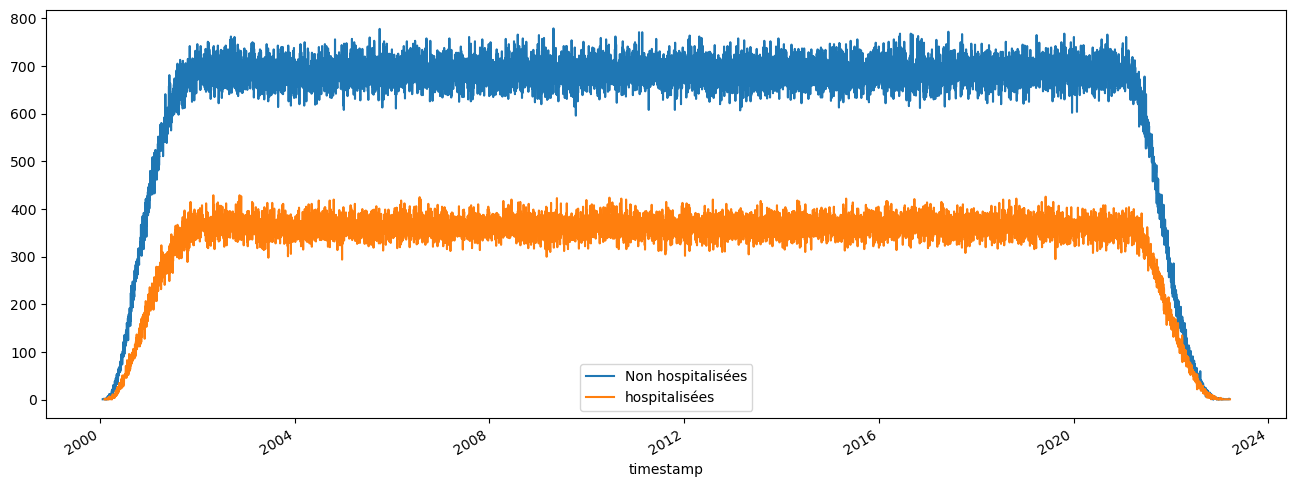

In [ ]:
#Distribution des données apres élimination des duplications
df[df['hospit'] == 0]['hospit'].groupby('timestamp').count().plot(figsize=(16,6), label = 'Non hospitalisées')
df[df['hospit'] == 1]['hospit'].groupby('timestamp').count().plot(figsize=(16,6), label = 'hospitalisées')
plt.legend()
plt.show()

<AxesSubplot: >

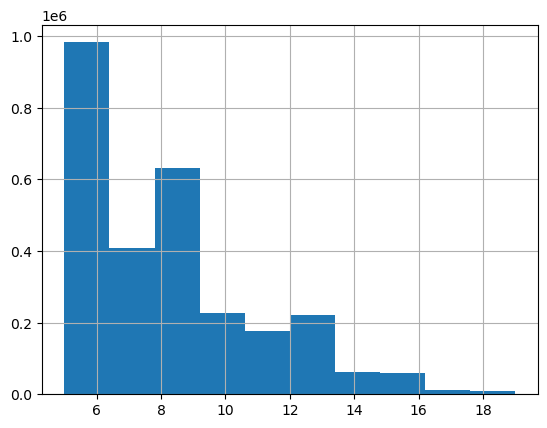

In [ ]:
df[df['hospit'] == 1]['poly'].hist()

In [ ]:
#Sauvegarde
df.to_csv('data/poly_notduplication.csv')

### Corrélation entre les drogues

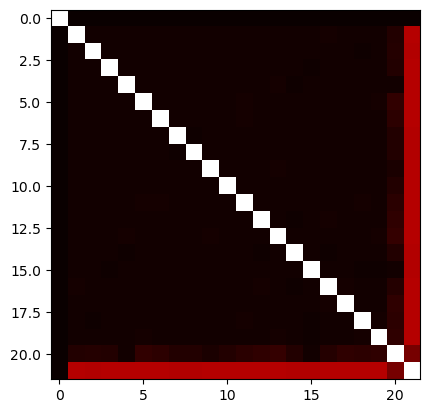

In [ ]:
plt.imshow(df.corr(),cmap='hot',interpolation='nearest')

In [ ]:
df = pd.read_csv('data/poly_notduplication.csv')

In [ ]:
nbr_prescription = []
nbr_hospit = []
for drug in drugs:
    nbr_prescription.append(df[df[drug]==1][drug].count())
    nbr_hospit.append(df[(df[drug]==1) & (df['hospit']==1)][drug].count())
    
print(nbr_prescription)
print(nbr_hospit)

[3230517, 3228614, 3224374, 3212857, 3242603, 3235603, 3226541, 3224408, 3227699, 3234904, 3237532, 3242563, 3243128, 3224277, 3213310, 3230275, 3230802, 3233158, 3234854]
[1184521, 1193663, 1180308, 1136150, 1230540, 1213583, 1181794, 1182106, 1160277, 1189177, 1207951, 1225982, 1237588, 1184314, 1137689, 1195140, 1219449, 1215407, 1225866]


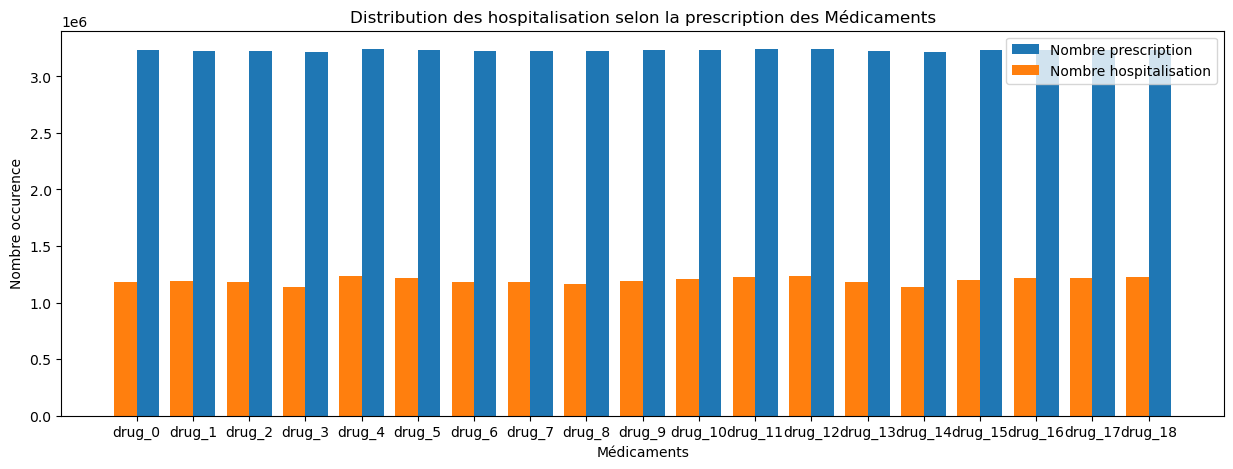

In [ ]:
X_axis = np.arange(len(drugs))

plt.figure(figsize=(15, 5) )
plt.bar(X_axis + 0.2, nbr_prescription, 0.4, label = 'Nombre prescription')
plt.bar(X_axis - 0.2, nbr_hospit, 0.4, label = 'Nombre hospitalisation')
  
plt.xticks(X_axis, drugs)
plt.xlabel("Médicaments")
plt.ylabel("Nombre occurence")
plt.title("Distribution des hospitalisation selon la prescription des Médicaments")
plt.legend()
plt.show()

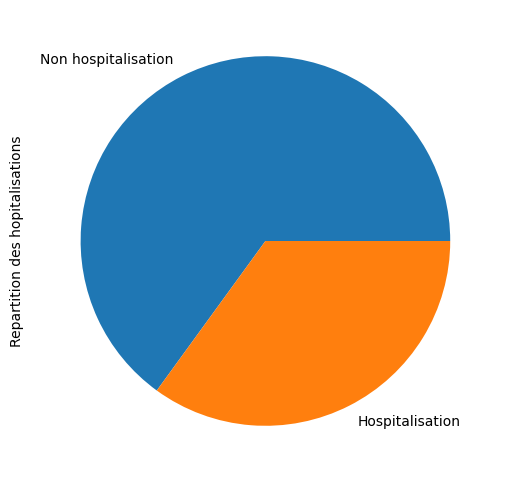

In [ ]:
series = pd.Series([0.65, 0.35], index=["Non hospitalisation", "Hospitalisation"], name="Repartition des hopitalisations")

series.plot.pie(figsize=(6, 6));

In [ ]:
df.shape

(8069307, 23)

# Traiter les données pour l'apprentissage

In [90]:
df = pd.read_csv('data\poly_notduplication.csv')

df.head()

,patient_id,drug_0,drug_1,drug_2,drug_3,drug_4,drug_5,drug_6,drug_7,drug_8,...,drug_11,drug_12,drug_13,drug_14,drug_15,drug_16,drug_17,drug_18,hospit,poly
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,5
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,1,0,1,0,0,5
2,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,0,1,0,1,5
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,0,1,0,0,5
4,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,5


In [93]:
df = df.drop(labels='poly', axis=1)

df.head()

KeyError: "['poly'] not found in axis"

In [94]:
df.to_csv('data/test_42_final.csv',  index=False)

In [98]:
df = pd.read_csv('data/test_42_final.csv')

sample =  df.sample(n=10000, random_state=1)

sample.to_csv('data/test_sample.csv', index=False)

sample.head()

,patient_id,drug_0,drug_1,drug_2,drug_3,drug_4,drug_5,drug_6,drug_7,drug_8,...,drug_10,drug_11,drug_12,drug_13,drug_14,drug_15,drug_16,drug_17,drug_18,hospit
5697590,2021585,1,1,1,0,1,0,0,1,0,...,1,0,0,0,1,1,1,0,1,1
5368377,1904907,0,0,1,1,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
6279433,2226602,1,1,1,0,1,0,0,1,1,...,0,1,1,0,0,0,0,0,0,0
5117617,1816262,0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,0,1,0
101857,35839,1,1,0,1,0,0,1,1,1,...,1,0,1,0,1,0,0,1,1,1
